In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
import datetime

start = "2023-01-01"
end = datetime.datetime.today().strftime('%Y-%m-%d')

tickers = pd.read_csv("portfolio.csv")
tickers

stocks_targets = []

for i in tickers.index:
    stocks_targets.append((tickers.iloc[i]["Ticker"], int(tickers.iloc[i]["Target"])))

existing_holdings = {
    tickers.iloc[i]["Ticker"]: float(tickers.iloc[i]["Holding"])
    for i in tickers.index
}


def get_stock_metrics(ticker, start_date, end_date, target_price):
    data = yf.download(ticker, start=start_date, end=end_date)
    data["Daily_Return"] = data["Close"].pct_change()

    avg_daily_return = data["Daily_Return"].mean()
    daily_vol = data["Daily_Return"].std()
    sharpe = (avg_daily_return / daily_vol) * np.sqrt(252) if daily_vol > 0 else 0

    current_price = data["Close"].iloc[-1].values[0]
    expected_return = (target_price - current_price) / current_price

    return {
        "Ticker": ticker,
        "CurrentPrice": current_price,
        "ExpectedReturn": expected_return,
        "SharpeRatio": sharpe,
        "DailyReturns": data["Daily_Return"].dropna()
    }

def rebalance_portfolio(stocks_targets, start_date, end_date):
    metrics_list = []
    for ticker, target_price in stocks_targets:
        metrics = get_stock_metrics(ticker, start_date, end_date, target_price)
        metrics_list.append(metrics)
    
    print(metrics_list)

stock = get_stock_metrics("AAPL", start, end, 230)
stock


[*********************100%***********************]  1 of 1 completed


{'Ticker': 'AAPL',
 'CurrentPrice': np.float64(229.35000610351562),
 'ExpectedReturn': np.float64(0.002834069671622352),
 'SharpeRatio': np.float64(1.0398009905401482),
 'DailyReturns': Date
 2023-01-04    0.010314
 2023-01-05   -0.010605
 2023-01-06    0.036794
 2023-01-09    0.004089
 2023-01-10    0.004456
                 ...   
 2025-08-04    0.004793
 2025-08-05   -0.002115
 2025-08-06    0.050907
 2025-08-07    0.031794
 2025-08-08    0.042358
 Name: Daily_Return, Length: 651, dtype: float64}

In [24]:
data = yf.download("AAPL", start=start, end=end)
data["Daily_Return"] = data["Close"].pct_change()

avg_daily_return = data["Daily_Return"].mean()
daily_vol = data["Daily_Return"].std()
sharpe = (avg_daily_return / daily_vol) * np.sqrt(252) if daily_vol > 0 else 0

current_price = data["Close"].iloc[-1].values[0]
expected_return = (230 - current_price) / current_price

[*********************100%***********************]  1 of 1 completed


In [25]:
expected_return

np.float64(0.002834069671622352)

In [155]:
data = pd.read_csv("performance.csv")

In [118]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6'], dtype='object')

In [133]:
import matplotlib.pyplot as plt

def plot_portfolio_comparison(df, date_col=None):
    """
    Plots columns '1', '2' and their delta over time.
    
    Parameters:
    - df: pandas DataFrame containing columns '1' and '2'
    - date_col: (optional) column name for x-axis dates (if None, uses df index)
    """
    # If date_col is specified, use it as x-axis; else use index
    x = df[date_col] if date_col else df.index
    
    val1 = df["2"]
    val2 = df["6"]
    delta = val2 - val1
    
    fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)
    
    axs[0].plot(x, val1, label='Portfolio 1')
    axs[0].plot(x, val2, label='Portfolio 2')
    axs[0].set_ylabel('Value')
    axs[0].set_title('Portfolio Values Over Time')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(x, delta, label='Delta (2 - 1)', color='red')
    axs[1].set_ylabel('Delta')
    axs[1].set_title('Difference Between Portfolios Over Time')
    axs[1].set_xlabel('Date' if date_col else 'Index')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming your DataFrame 'df' has columns '1', '2' and a datetime index or a date column 'Date'
# plot_portfolio_comparison(df, date_col='Date')



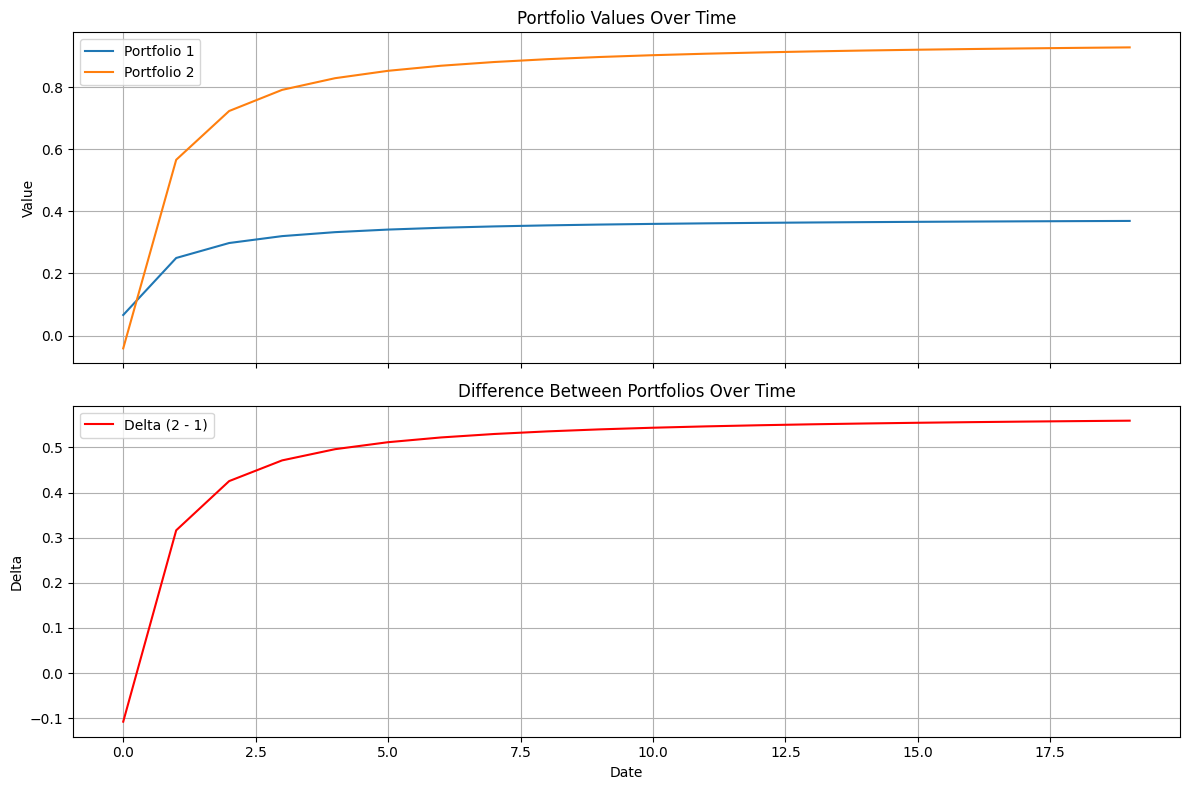

In [156]:
plot_portfolio_comparison(data, "Unnamed: 0")

In [153]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical prices
ticker = "AXP"
start_date = "2015-01-01"
end_date = "2025-08-08"



def sharpe_ratio(ticker, start_date, end_date):

  data = yf.download(ticker, start=start_date, end=end_date)

  # Calculate daily returns
  data["Daily_Return"] = data["Close"].pct_change()

  #Calculate average daily return
  avg_daily_return = data["Daily_Return"].mean()


  # Calculate daily volatility (std dev of returns)
  daily_vol = data["Daily_Return"].std()
  print(daily_vol)

  log_returns = np.log(data["Close"] / data["Close"].shift(1))
  log_returns = log_returns.dropna()
  daily_vol = log_returns.std()
  print(daily_vol.values[0])
  log_returns_mean = log_returns.mean()
  log_returns = log_returns_mean.values[0] * 252
  sharpe = (log_returns_mean.values[0] / daily_vol.values[0]) * np.sqrt(252) if daily_vol.values[0] > 0 else 0

  

  # Annualize volatility (assuming ~252 trading days)
  annual_vol = daily_vol * np.sqrt(252)

  sr = (avg_daily_return / daily_vol)*np.sqrt(252)

  print(f"Average Daily Return: {avg_daily_return:.4f}")
  print(f"Daily Volatility: {daily_vol}")
  print(f"Sharpe Ratio: {sharpe}")

  return sharpe


In [149]:
def plot_stock_price(ticker, start_date, end_date):
  data = yf.download(ticker, start=start_date, end=end_date)
  data["Close"].plot()

In [154]:
sharpe_ratio("NVDA", start_date, end_date)

[*********************100%***********************]  1 of 1 completed

0.03097364206482035
0.030759525664346716
Average Daily Return: 0.0027
Daily Volatility: Ticker
NVDA    0.03076
dtype: float64
Sharpe Ratio: 1.147789317621639


np.float64(1.147789317621639)

[*********************100%***********************]  1 of 1 completed


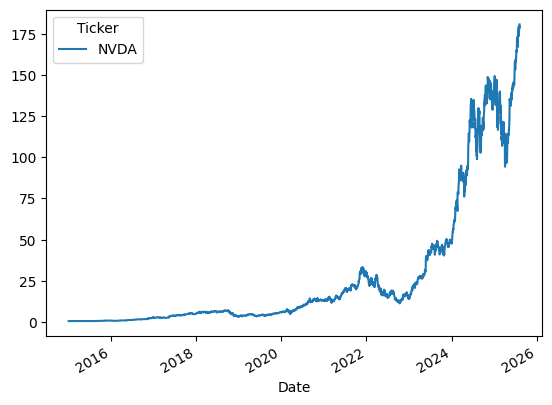

In [139]:
plot_stock_price("NVDA", start_date, end_date)

In [123]:
def expected_return_overvalued(current_price, fair_value, annual_growth_rate, dividend_yield=0.0, years_to_revert=5):
    """
    Calculates expected annualized return for an overvalued stock.
    
    Parameters:
        current_price (float): Current market price of the stock
        fair_value (float): Estimated intrinsic value
        annual_growth_rate (float): Expected EPS or revenue growth rate (decimal, e.g., 0.08 for 8%)
        dividend_yield (float): Annual dividend yield (decimal, e.g., 0.02 for 2%)
        years_to_revert (int): Number of years until price is expected to revert to fair value

    Returns:
        float: Annualized expected return (decimal)
    """
    # Step 1: Base return from growth + dividends
    base_return = annual_growth_rate + dividend_yield
    
    # Step 2: Price reversion impact
    reversion_factor = (fair_value / current_price) ** (1 / years_to_revert) - 1
    
    # Step 3: Total expected return
    total_expected_return = base_return + reversion_factor
    return total_expected_return


# Example:
curr_price = 120.0
fair_val = 100.0
growth = 0.11  # 6% EPS growth
div_yield = 0.00  # 2% dividend
years_revert = 5  # Reverts to fair value in 4 years

er = expected_return_overvalued(curr_price, fair_val, growth, div_yield, years_revert)
print(f"Expected Annualized Return: {er*100:.2f}%")


Expected Annualized Return: 7.42%
